## 1 - Paquetes/librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator)

import os

## 2 - Variables constantes

In [2]:
COLORES_CORPORATIVOS = ['#0072CE', '#E31C79',
                        '#00968F', '#D9C756', '#FE5000', '#B1B3B3']
COLORES = ['#2709d6', '#f36a2c', '#09d267']

HORAS_DIURNAS = ['H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14',
                 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'HoraPunta']

MESES = pd.DataFrame({'name': ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio",
                                 "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"],
                      "shortName": ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"],
                      }).set_index(pd.RangeIndex(1, 13))

DIAS = pd.DataFrame({"name": ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"],
                     "shortName": ["Lun", "Mar", "Mi", "Jue", "Vie", "Sab", "Dom"]}).set_index(pd.RangeIndex(1, 8))


## 3 - Carga del dataset

In [3]:
meses_oferta = pd.read_pickle('./datos/output/meses_oferta.pkl')
meses_oferta['fechaCorta'] = meses_oferta[['year','month']].apply(lambda x: pd.to_datetime(f"{x[0]}/{x[1]}/01",format='%Y/%m/%d').strftime('%B.%Y'),axis=1)
meses_oferta

,CLinea,Elinea,Denominacion,year,month,IdFranja,MediaCochesMes,MediaCochesMes_Laborables,fechaCorta
18,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019,1,H06,3.840000,4.000000,January.2019
0,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019,1,H07,5.580645,6.857143,January.2019
1,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019,1,H08,6.580645,7.857143,January.2019
2,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019,1,H09,7.387097,8.857143,January.2019
3,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019,1,H10,8.903226,10.857143,January.2019
...,...,...,...,...,...,...,...,...,...
22601,786,SE,PRINCIPE DE VERGARA - CALLAO,2019,5,H23,4.266667,5.000000,May.2019
638862,786,SE,PRINCIPE DE VERGARA - CALLAO,2019,5,HoraPunta,7.000000,7.000000,May.2019
22602,786,SE,PRINCIPE DE VERGARA - CALLAO,2019,5,M00,3.633333,4.000000,May.2019
22603,786,SE,PRINCIPE DE VERGARA - CALLAO,2019,5,M01,3.000000,3.000000,May.2019


## 4 - Evolución núm. autobuses

In [4]:
def graficar(dataset:pd.DataFrame,size:tuple,num_linea:int,franja:str,valores:str='MediaCochesMes',guardar:bool=False):
    '''
    Funcion que genera un gráfico de lineas para los meses de 2019, 2020 y 2021 en la franja hora que se espcifica.
    Parámetros
    ----------
    dataset   : DataFrame. Datos generales sobre las líneas o línea.
    num:linea : int. Número de la línea que se quiere consultar.
    franja    : str. Intervalo horario que se quiere consultar.
    valores   : str. Nombre de la medida que se quiere consultar.
    guardar   : bool. Opción para exportar y guardar la imagen. `False` por defecto   
    '''
    fig, axes = plt.subplots(figsize=size,dpi=100)
    axes.spines.right.set_visible(False)
    axes.spines.top.set_visible(False)


    # Filtro por linea y franja
    listado_franjas = dataset.loc[dataset['CLinea']==num_linea,'IdFranja'].unique()

    dataset = dataset[(dataset['CLinea']==num_linea)&(dataset['IdFranja']==franja)]
    dataset = dataset.dropna(subset=[valores]).drop_duplicates(subset=['year','month']).reset_index(drop=True)
    
    if len(dataset)==0:
        raise Exception(f"Las franjas horarias de la linea {num_linea} son: {listado_franjas}") 
        
    lineaPublico = str(dataset.loc[0,"Elinea"])
    cartel_linea = str(dataset.loc[0,"Denominacion"])

    # Visualizo los datos (media) y fechas
    for idx_color,fecha in enumerate(dataset['year'].unique()):
        axes.plot(dataset.loc[dataset['year'] == fecha,'fechaCorta'],dataset.loc[dataset['year'] == fecha, valores],'-o',label='Franja: '+ franja +'\nAño: '+str(fecha),color=COLORES_CORPORATIVOS[idx_color])


    # Configuraciones visuales
    axes.set_xticks(range(0,len(dataset['fechaCorta'])))
    axes.set_xticklabels(dataset['fechaCorta'], rotation = 45, ha="right")
    
    # axes.set_yticks(range(0,int(dataset[valores].max()+3)))
    axes.set_ylim([0,dataset[valores].max()+3])

    xTicks = axes.get_xticklabels()
    indices_enero = [i for i, fecha in enumerate(dataset['month']) if fecha==1]
            

    for indiceEnero in indices_enero:
        xTicks[indiceEnero].set_weight('bold')
    
    # Título y nombre ejes
    axes.set_xlabel('Fecha')
    axes.set_ylabel('# Autobuses')
    axes.set_title(label=f'Evolución núm. autobuses ({valores})\nLÍNEA {lineaPublico}: {cartel_linea}',pad=20)

    axes.grid(linestyle='--', linewidth=1, axis='both')

    leg = axes.legend(bbox_to_anchor=(1.025, 1), loc=2, borderaxespad=0)


    # plt.legend(loc="lower right") # Esto puede deshabilitar quitando la línea
    if guardar:
        plt.savefig(fname=f'images/LÍNEA_{num_linea}_{franja}_{cartel_linea}.jpg',format='jpg', bbox_inches='tight', dpi=200)


    fig.set_facecolor('white')

    plt.show()

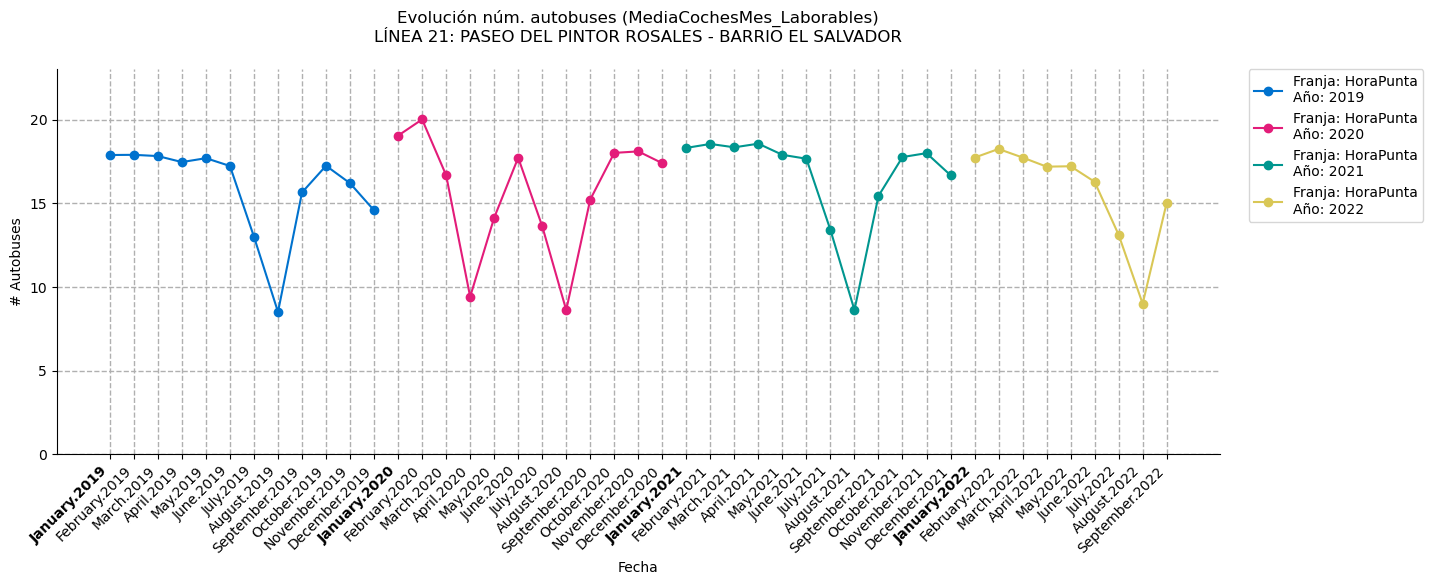

In [5]:
graficar(size=(15,5),dataset=meses_oferta,num_linea=21,franja='HoraPunta',valores='MediaCochesMes_Laborables')

## 5 - Cálculo de nuevas columnas

### 5.1 - Número medio de coches en días laborables

In [6]:
meses_oferta['MediaCoches_1dia_laborable'] = meses_oferta.groupby(by=['year','month','IdFranja'],as_index=False)['MediaCochesMes_Laborables'].transform('sum')
meses_oferta[meses_oferta['IdFranja'].isin(HORAS_DIURNAS)].sort_values(by=['CLinea','MediaCoches_1dia_laborable',],ascending=[True,False]).head(10)

,CLinea,Elinea,Denominacion,year,month,IdFranja,MediaCochesMes,MediaCochesMes_Laborables,fechaCorta,MediaCoches_1dia_laborable
140185,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,2,H09,8.321429,9.900000,February.2022,1881.968182
140184,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,2,H08,7.500000,8.950000,February.2022,1879.468182
144104,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,3,H09,8.516129,9.956522,March.2022,1879.222222
144103,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,3,H08,7.677419,9.000000,March.2022,1876.048309
90056,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021,4,H09,8.000000,9.850000,April.2021,1860.513158
90055,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021,4,H08,7.233333,8.900000,April.2021,1858.863158
90019,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021,2,H09,8.357143,9.900000,February.2021,1855.450000
90018,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021,2,H08,7.535714,8.950000,February.2021,1853.300000
151985,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,5,H09,7.774194,9.700000,May.2022,1848.300000
151984,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,5,H08,7.193548,8.950000,May.2022,1848.150000


In [7]:
oferta_ymf = meses_oferta.loc[meses_oferta['IdFranja'].isin(HORAS_DIURNAS), ['IdFranja', 'month', 'year', 'MediaCoches_1dia_laborable']]\
    .drop_duplicates(subset=['year', 'month', 'IdFranja']).copy()

oferta_ymf = oferta_ymf.loc[:, ['IdFranja', 'month', 'year', 'MediaCoches_1dia_laborable']]\
                        .set_index(['IdFranja', 'month', 'year'])['MediaCoches_1dia_laborable'].unstack()


### 5.2 - Gráficos evolución autobuses

In [16]:
def diferencia(year_1: int, year_2: int, franja: str = 'HoraPunta', guardar:bool=False):
    fig, ax = plt.subplots(figsize=(8, 5))
    if (year_1 and year_2) not in oferta_ymf.columns.unique():
        raise ValueError(f"Puedes hacer la comparativa entre estos años: {list(oferta_ymf.columns.unique())}")
        return

    if year_1 == year_2:
        raise ValueError(f"No se puede hacer una comparación entre un mismo año. {list(oferta_ymf.columns.unique())}") 
        return

    # Creación de las barras horizontales.
    DATA = (oferta_ymf.loc[franja, year_2] - oferta_ymf.loc[franja, year_1]).dropna()
    COLORES_PLOT = [COLORES_CORPORATIVOS[1] if diff_value <
                    0 else COLORES_CORPORATIVOS[2] for diff_value in DATA]
    ax.barh(y=DATA.index.values, width=DATA, color=COLORES_PLOT)

    # EJE_Y: Rango, etiquetas e invertir.
    ax.set_yticks(DATA.index.values)
    ax.set_yticklabels(MESES.loc[DATA.index.values, 'name'])
    ax.invert_yaxis()

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    # Título y subtítulo.
    ax.set_title(f'Comparativa {year_2} vs {year_1}',
                 loc='left', size=18, pad=30, weight='bold')

    if(franja == 'HoraPunta'):
        franja = 'HoraPunta (H07 - H09)'

    ax.text(x=.125, y=.91,
            s=f"Diferencia de autobuses en {franja}",
            transform=fig.transFigure,
            ha='left',
            fontsize=14,
            alpha=.8)

    # Fuente de datos
    ax.text(x=.603, y=0.02,
            s="""Fuente: Empresa Municipal de Transportes de Madrid""",
            transform=fig.transFigure,
            ha='left',
            fontsize=6,
            alpha=.7)

    ax.plot()

    if guardar:
        os.makedirs('images/graficos/autobueses_circulacion/', exist_ok=True) 
        fig.savefig(fname=f'images/graficos/autobueses_circulacion/diferencia_{franja.split(" ")[0]}_{year_1}_{year_2}.png',bbox_inches='tight',format='png',dpi=200)


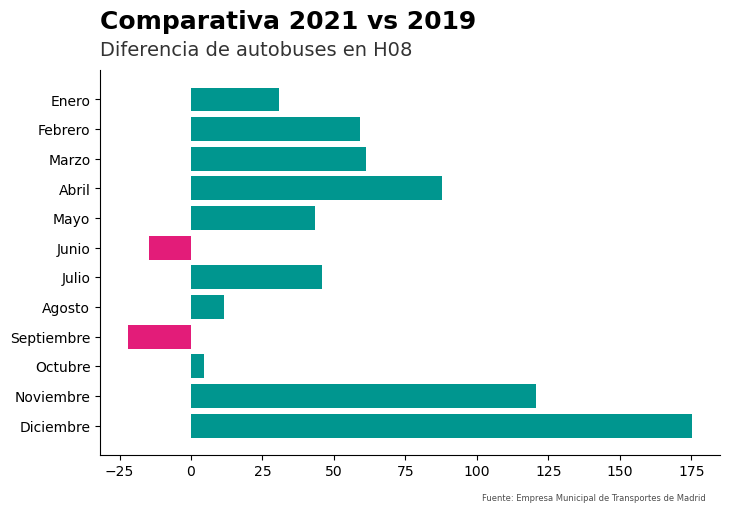

In [17]:
diferencia(year_1=2019, year_2=2021, franja='H08')


In [18]:
def evolucion_mes(mes: int = 1, franja: str = 'HoraPunta', color: str = COLORES_CORPORATIVOS[0], guardar:bool=False):
    # Creamos la figura y el eje
    fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    # Obtenemos los datos
    DATA = oferta_ymf.loc['HoraPunta'].loc[5].drop_duplicates()
    YEARS = DATA.index.values

    if(franja == 'HoraPunta'):
        franja = 'HoraPunta (H07 - H09)'

    # Gráficamos
    bars = ax.bar(
        YEARS, DATA, label=YEARS, color=color)
    ax.set_xticks(YEARS)

    # Rango de ejes
    ax.set_ylim(0, int(DATA.max())+300, 100)
    # ax.set_yticks(range(0,int(DATA.max())+300,100),minor=True)
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    # Add in title and subtitle
    ax.set_title(
        f'Autobuses en circulación en {MESES.loc[mes,"name"]}', loc='left', size=18, pad=50, weight='bold')
    ax.text(x=.125, y=0.96,
            s=f"Número de autobuses en {franja}",
            transform=fig.transFigure,
            ha='left',
            fontsize=14,
            alpha=.8)
    # Set source text
    ax.text(x=.603, y=0.02,
            s="""Fuente: Empresa Municipal de Transportes de Madrid""",
            transform=fig.transFigure,
            ha='left',
            fontsize=6,
            alpha=.7)
    ax.bar_label(bars, padding=-13, color='white', fmt='%.0f')
    ax.plot()
        
    if guardar:
        os.makedirs('images/graficos/autobueses_circulacion/', exist_ok=True) 
        fig.savefig(fname=f'images/graficos/autobueses_circulacion/mensual_{franja.split(" ")[0]}_{MESES.loc[mes,"name"]}_{str(YEARS)}.png',bbox_inches='tight',dpi=200)


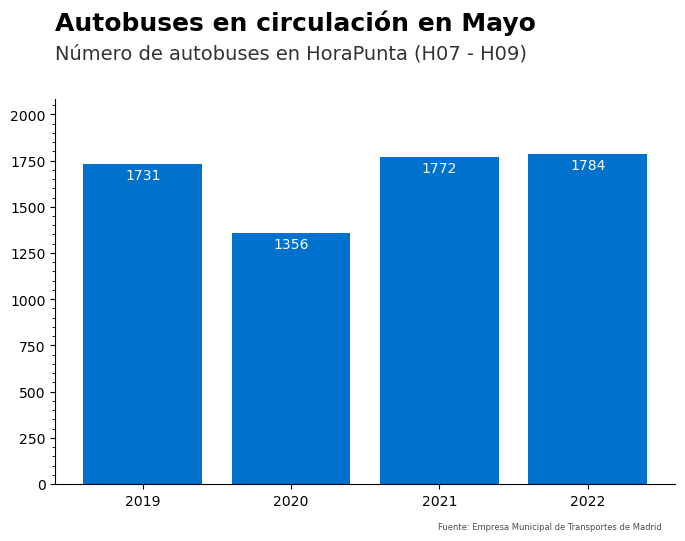

In [19]:
evolucion_mes(mes=5,franja='HoraPunta',guardar=True)

In [20]:
def en_circulacion(franja:str='HoraPunta',guardar:bool=False):
    fig, ax = plt.subplots(figsize=(8, 5),dpi=100)
    
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    
    # Obtenemos los datos
    DATA = oferta_ymf.loc[franja]
    YEARS = sorted(DATA.columns)

    for i_color,year in enumerate(YEARS):
        ax.plot(DATA[year],'-o',label=str(year),color=list(reversed(COLORES_CORPORATIVOS))[2:][i_color])

    if(franja=='HoraPunta'):
        franja = 'HoraPunta (H07 - H09)'


    ax.set_xticks(DATA.index.values)
    ax.set_xticklabels(MESES.loc[DATA.index.values, 'shortName'])
    ax.set_ylim(600)
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    # Add in title and subtitle
    ax.set_title('Autobuses en circulación',loc='left',size=18,pad=40,weight='bold')
    ax.text(x=.125, y=.94, 
            s=f"Número de autobuses en {franja}", 
            transform=fig.transFigure, 
            ha='left', 
            fontsize=14, 
            alpha=.8)
    # Set source text
    ax.text(x=.603, y=0.02,
            s="""Fuente: Empresa Municipal de Transportes de Madrid""", 
            transform=fig.transFigure, 
            ha='left', 
            fontsize=6, 
            alpha=.7)

    ax.legend()
    ax.plot()
    
    if guardar:
        os.makedirs('images/graficos/autobueses_circulacion/', exist_ok=True) 
        fig.savefig(fname=f'images/graficos/autobueses_circulacion/anual_{franja.split(" ")[0]}_{str(YEARS)}.png',bbox_inches='tight',dpi=200)


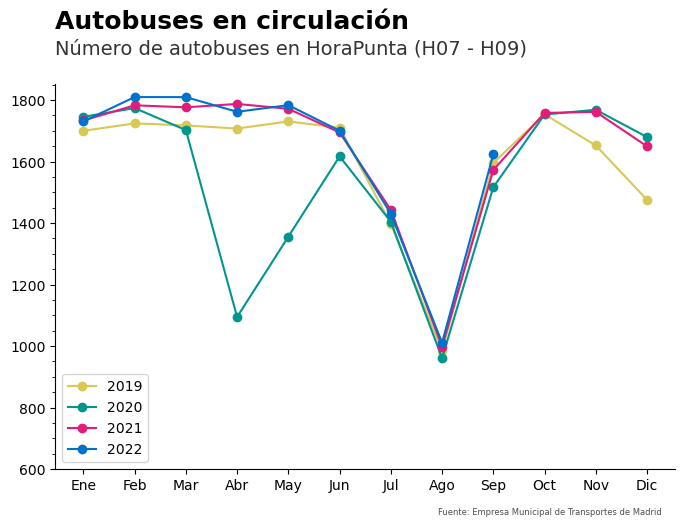

In [21]:
en_circulacion(franja='HoraPunta',guardar=True)